# CCN for temporal signals classification

### Part 1: Synthetic Dataset Creation
1. Generate a synthetic dataset using NumPy. The dataset consists of a set of time series samples, each with a fixed length (e.g., 100 data points).
2. There are at least three different signal classes with distinct characteristics:
   - Sine waves with different frequencies
   - Step signals
   - Noisy signals
3. The dataset is then split into training (70%), validation (15%), and test (15%) sets.

#### 1.0 Import of necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style("darkgrid")
%matplotlib inline  

#### 1.1 Custom functions

In [ ]:
def generate_sinusoidal_signal(lenght, a=1, f0=None, f0_range=[2,10]):
    
    """
    The function 'generate_sinusoidal_signal' generates a sinusoidal signal.

    Args:
        length (int): Length of the signal.
        a (float, optional): Amplitude of the signal (default is 1).
        f0 (float, optional): Frequency of the signal. If not specified, a value is randomly sampled
                          within the f0_range.
        f0_range (list, optional): Frequency range for random sampling (default is [2, 10]).

    Returns:
        numpy.ndarray: The generated sinusoidal signal with the specified length.
    """

    
    t = np.linspace(0, 1, lenght)
    
    if not f0:
        f0 = np.random.uniform(f0_range[0], f0_range[1])
    
    return a*np.cos(2*np.pi*f0*t)
    

def generate_step_signal(lenght, a=1, interval=[3,10]):
    """
    The function 'generate_step_signal' generates a step signal with random values within a given range.

    Arguments:
        length (int): length of the signal.
        a (float, optional): amplitude of the signal (default is 1).
        interval (list, optional): range of allowed values for random selection (default is [3, 10]).

    Returns:
        numpy.ndarray: the generated step signal of the specified length.
    """

    
    return a*np.random.choice(interval, size=lenght)

def generate_signal_with_noise(y, target_noise = 10, mean_noise=0):
    """
    The function 'generate_signal_with_noise' generates a signal with added Gaussian noise.

    Args:
        y (numpy.ndarray): the signal to which noise will be added.
        target_noise (float, optional): the desired noise variance (default is 10).
        mean_noise (float, optional): the mean value of the Gaussian noise (default is 0).

    Returns:
        numpy.ndarray: the original signal with added Gaussian noise.
    """

    
    t = len(y)
    noise = np.random.normal(mean_noise, np.sqrt(target_noise), t)
    
    return y + noise

def plot_signals(dfs, figsize=(15, 15)):
    """
    The function 'plot_signals' plots a series of signals contained in a list of lists, each consisting of dataframes
    and their corresponding labels. This function assumes that the length of the list of lists is even.

    Args:
        dfs (list of lists): a list of pairs [name, dataframe] from which to extract the signals to plot.
        figsize (tuple, optional): dimensions of the plot figure (default is (15, 15)).

    Returns:
        matplotlib.figure.Figure: the figure containing the input signals.
    """

    
    n_rows = len(dfs)//2
    n_cols = len(dfs)//2
    
    tabs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    fig, axs = plt.subplots(n_rows, n_cols)
    
    i = 0
    for row in range(n_rows):
        for col in range(n_cols):
            
            axs[row, col].plot(dfs[i][1].sample(1, random_state=42).values.flatten(), tabs[i])
            axs[row, col].set_title(dfs[i][0])
            
            i += 1
            
    for ax in axs.flat:
        ax.label_outer()
            
    return fig

#### 1.2 Main code

In [ ]:
signal_len = 100
num_examples = 100000
num_sin_examples = np.random.randint(10, num_examples//4)
num_step_examples = np.random.randint(10, num_examples//4)
num_noise_step_examples = np.random.randint(10, (num_examples - num_sin_examples - num_step_examples))
num_noise_sin_examples = num_examples - num_sin_examples - num_step_examples- num_noise_step_examples

In [ ]:
print(f"Numero di esempi {num_examples}")
print(f"di cui: {num_sin_examples} sinudoidali, {num_step_examples} a gradino, {num_noise_step_examples} sinusoidali con rumore, {num_noise_sin_examples} a gradino con rumore")

Numero di esempi 100000
di cui: 370 sinudoidali, 21961 a gradino, 60815 sinusoidali con rumore, 16854 a gradino con rumore


In [ ]:
a = np.random.uniform(0.5, 10)
mean_noise = np.random.uniform(0, 5)
target_noise = np.random.uniform(0.5, 10)

In [ ]:
# We call the above-defined functions to generate the desired signals

# Sinusoidal signal
df_sin = pd.DataFrame([generate_sinusoidal_signal(signal_len, a) for i in range(num_sin_examples)])
# Step signal
df_step = pd.DataFrame([generate_step_signal(signal_len, a) for i in range(num_step_examples)])
# Sinusoidal signal with Gaussian noise
df_sin_wt_noise = pd.DataFrame([generate_signal_with_noise(
                                    generate_sinusoidal_signal(signal_len, a),
                                    target_noise,
                                    mean_noise) 
                                for i in range(num_noise_sin_examples)])
# Step signal with Gaussian noise
df_step_wt_noise = pd.DataFrame([generate_signal_with_noise(
                                    generate_step_signal(signal_len, a),
                                    target_noise,
                                    mean_noise) 
                                for i in range(num_noise_step_examples)])

# Let’s create a list of lists to store the dataframes for plotting later.
dfs = list(
    zip(
        ['Segnale sinusoidale', 'Segnale a gradino', 'Segnale sinusoidale con rumore', 'Segnale a gradino con rumore'],
        [df_sin, df_step, df_sin_wt_noise, df_step_wt_noise]
    )
)

# add labels to the different types of signals:
#    0 for 'sinusoidal'
df_sin['label'] = np.zeros(num_sin_examples)
#    1 for 'step',
df_step['label'] = np.ones(num_step_examples)
#    2 for 'sinusoidal with Gaussian noise',
df_sin_wt_noise['label'] = 2*np.ones(num_noise_sin_examples)
#    3 for 'step with Gaussian noise',
df_step_wt_noise['label'] = 3*np.ones(num_noise_step_examples)

# concatenate the created datasets into a single output dataset
df = pd.concat([df_sin, df_step, df_sin_wt_noise, df_step_wt_noise])

# delete redundant datasets and clean up memory
del df_sin, df_step, df_sin_wt_noise, df_step_wt_noise
gc.collect()

0

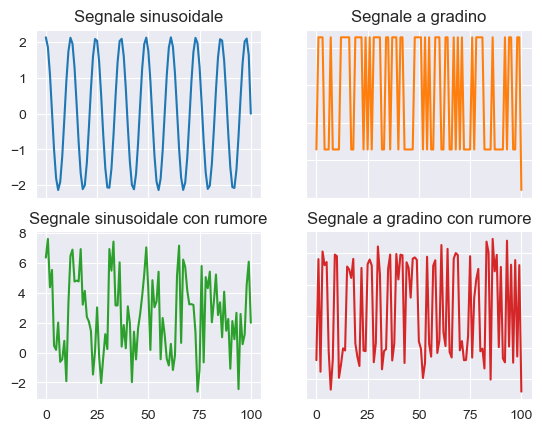

In [ ]:
# plot of the generated signals
fig = plot_signals(dfs)

In [ ]:
# statistics on the created dataset
print(f"Il dataset ha dimensioni {df.shape}")
display(df.head())

Il dataset ha dimensioni (100000, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,2.139993,1.724034,0.637861,-0.696279,-1.759743,-2.139110,-1.686902,-0.578916,0.754123,1.793999,...,0.871759,-0.455511,-1.605702,-2.131680,-1.828972,-0.815255,0.515390,1.645679,2.136214,0.0
1,2.139993,2.098874,1.977097,1.779342,1.513208,1.188923,0.818948,0.417503,0.000012,-0.417478,...,1.188798,1.513102,1.779258,1.977039,2.098845,2.139993,2.098903,1.977154,1.779425,0.0
2,2.139993,1.752507,0.730373,-0.556257,-1.641445,-2.132204,-1.850813,-0.899173,0.378091,1.518435,...,1.288065,2.035580,2.045935,1.315381,0.108478,-1.137709,-1.971889,-2.091974,-1.454477,0.0
3,2.139993,1.989655,1.559766,0.910724,0.133724,-0.662065,-1.364832,-1.875837,-2.123281,-2.072398,...,-2.076382,-2.121197,-1.867977,-1.352302,-0.646624,0.149906,0.925374,1.570824,1.995569,0.0
4,2.139993,2.090857,1.945704,1.711201,1.398117,1.020828,0.596661,0.145094,-0.313136,-0.756986,...,1.652222,1.324512,0.935979,0.504464,0.049783,-0.407185,-0.845453,-1.244897,-1.587173,0.0


Isolate the target part ('y') and split the dataset into three subsets:
* training set **X_train - y_train**,
* validation set **X_val - y_val**,
* test set **X_test - y_test**.

In [ ]:
X = df.drop(['label'], axis=1).values
y = df['label'].values

In [ ]:
# Training: 70%, Validation: 15%, Test: 15%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Dimensioni dei dataset:")
print(f"Training set {X_train.shape[0]/num_examples*100}%: {X_train.shape}, {y_train.shape}")
print(f"Validation set {X_val.shape[0]/num_examples*100}%: {X_val.shape}, {y_val.shape}")
print(f"Test set {X_test.shape[0]/num_examples*100}%: {X_test.shape}, {y_test.shape}")

Dimensioni dei dataset:
Training set 70.0%: (70000, 100), (70000,)
Validation set 15.0%: (15000, 100), (15000,)
Test set 15.0%: (15000, 100), (15000,)


### Part 2: Model Architecture
1. Using TensorFlow/Keras, we define a convolutional neural network (CNN) architecture suitable for time-series signal classification.
2. We Compile the model and evaluate it.

#### 2.0 Import of necessary libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model

#### 2.1 Custom functions

In [ ]:
def make_cnn_model(input_shape, filters=32, kernel_size=3, dropout_rate = 0.5, padding='same'):
    """
    The function 'make_cnn_model' instantiates a convolutional neural network (CNN) model using Keras functional API.

    Args:
        input_shape (tuple): the shape of the input, e.g., (signal_length, number_of_channels).
        filters (int, optional): the number of filters in convolutional layers (default is 32).
        kernel_size (int, optional): the kernel size for convolutional layers (default is 3).
        dropout_rate (float, optional): the dropout rate for dropout layers (default is 0.5).

    Returns:
        tensorflow.python.keras.engine.functional.Functional: the created CNN model.
    """
    
    input_layer = layers.Input(input_shape)

    conv1 = layers.Conv1D(filters=filters, kernel_size=kernel_size, padding=padding)(input_layer)
    # add a batch normalization layer before applying the activation function
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.ReLU()(conv1)
    # add a dropout layer for regularization and to prevent overfitting
    conv1 = layers.Dropout(dropout_rate)(conv1)

    conv2 = layers.Conv1D(filters=filters, kernel_size=kernel_size, padding=padding)(conv1)
    # add a batch normalization layer before applying the activation function
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.ReLU()(conv2)
    # add a dropout layer for regularization and to prevent overfitting
    conv2 = layers.Dropout(dropout_rate)(conv2)

    conv3 = layers.Conv1D(filters=filters, kernel_size=kernel_size, padding=padding)(conv2)
    # add a batch normalization layer before the activation function
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.ReLU()(conv3)
    # add a dropout layer for regularization and to prevent overfitting
    conv3 = layers.Dropout(dropout_rate)(conv3)

    # finish with a pooling layer, specifically a global average pooling layer
    global_ave_pooling = layers.GlobalAveragePooling1D()(conv3)
    
    # final layer with 'softmax' activation function
    output_layer = layers.Dense(num_labels, activation="softmax")(global_ave_pooling)

    return models.Model(inputs=input_layer, outputs=output_layer)

#### 2.2 Main code

Perform preprocessing of the target variable since it needs to be one-hot encoded before input to the CNN. Because the original target variable was not of string type, we can directly use TensorFlow Keras's **to_categorical** method without resorting to additional Label Encoding from sklearn.

In [ ]:
num_labels = len(set(y))

y_train = to_categorical(y_train, num_labels)
y_val = to_categorical(y_val, num_labels)
y_test = to_categorical(y_test, num_labels)

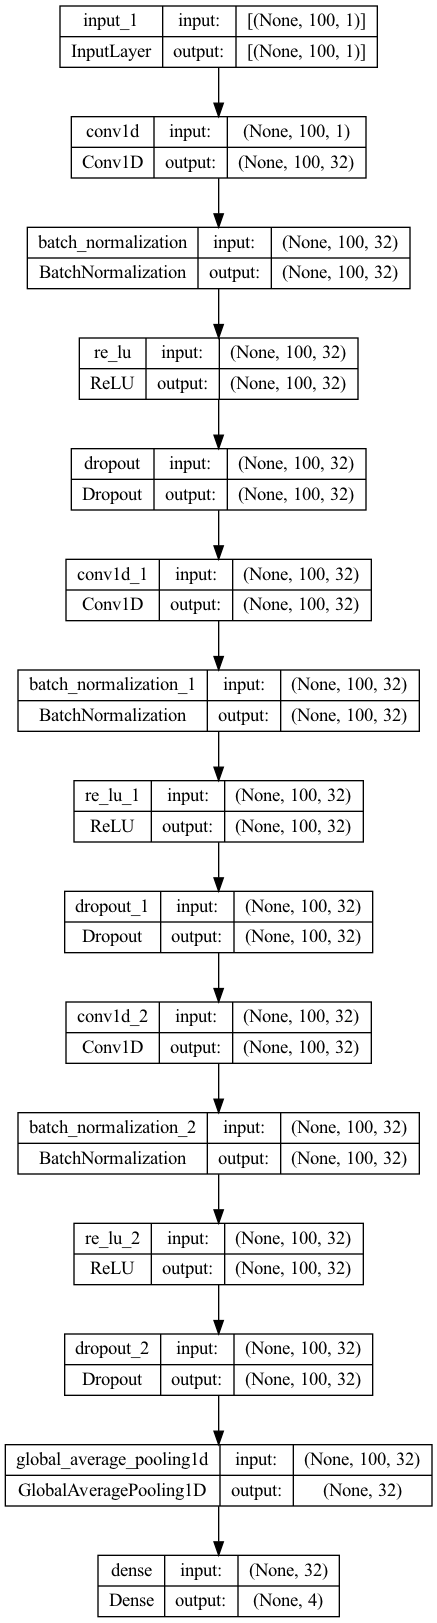

In [ ]:
# generate the model
model = make_cnn_model(input_shape=(X_train.shape[1], 1))
# use a built-in Keras method to visualize the structure of the created model
plot_model(model, show_shapes=True)

In [ ]:
# compile the model using 'categorical_crossentropy' as the loss function since this is a multi-class classification problem
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 100, 32)          128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 100, 32)           0         
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 32)           3104      
                                                             

### Part 3: Training and Validation
1. Train the model on the training dataset by setting the model hyperparameters and monitoring performance during training on the validation dataset.
2. The loss and accuracy of the model during the training and evaluation phases are then graphically represented using the `matplotlib` library.

#### 3.0 Import of necessary libraries

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint

#### 3.1 Custom functions

In [ ]:
def training_plot(real_n_epochs, train_loss, val_loss, train_acc, val_acc):
    """
    The function 'training_plot' plots the learning curve of the model in terms of loss and accuracy.

    Args:
        real_n_epochs (int): the actual number of epochs run during training 
        (needed if an early-stopping callback is used).
        train_loss (list): list of loss values during training on the training set.
        val_loss (list): list of loss values during training on the validation set.
        train_acc (list): list of accuracy values during training on the training set.
        val_acc (list): list of accuracy values during training on the validation set.

    Returns:
        None
    """
    
    # plot of the loss
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, real_n_epochs + 1), train_loss, label = 'train loss')
    plt.plot(range(1, real_n_epochs + 1), val_loss, label = 'validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    # plot of the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, real_n_epochs + 1), train_acc, label = 'train accuracy')
    plt.plot(range(1, real_n_epochs + 1), val_acc, label='validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    
    return

#### 3.2.1 Main code

Epoch 1/64


2023-10-15 17:57:07.708660: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3500/3500 [==============================] - 17s 5ms/step - loss: 0.0616 - accuracy: 0.9870 - val_loss: 0.0040 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/64
3500/3500 [==============================] - 16s 5ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 5.6798e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/64
3500/3500 [==============================] - 16s 5ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 9.5595e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 4/64
3500/3500 [==============================] - 17s 5ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 5/64
3500/3500 [==============================] - 17s 5ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 4.8163e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/64
3500/3500 [==============================] - 16s 5ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0010 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 7/64
3500/3500 [=============================

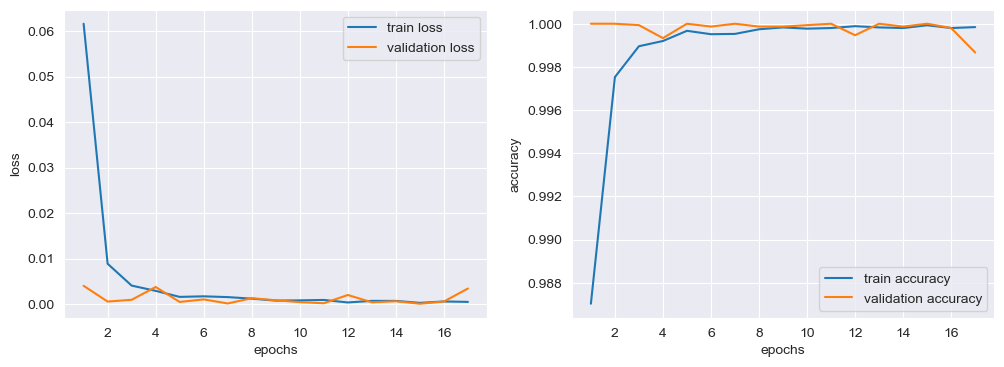

In [ ]:
# train the model while monitoring performance on the validation dataset
epochs = 20
batch_size = 64

callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=1e-4),
    EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1),
]

history = model.fit(
    X_train, 
    y_train, 
    epochs, 
    batch_size, 
    validation_data = (X_val, y_val),
    callbacks=callbacks
)

# extract the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plots: loss and accuracy
real_n_epochs = len(history.history['loss'])
training_plot(real_n_epochs, train_loss, val_loss, train_acc, val_acc)

Once the model has been instantiated and trained, we proceed to enhance it by implementing a hyperparameter fine-tuning algorithm. These are parameters not learned directly by the model during training but must be set beforehand. Choosing the optimal set of hyperparameters can significantly impact the model’s performance. Among others, the following can be optimized:

* **Kernel size**: the size of the convolutional windows used to analyze the input data.  
* **Number of filters**: the number of feature maps used in the convolutional layers. More filters increase model complexity.  
* **Activation function**: introduces non-linearity into the model (e.g., ReLU).  
* **Pooling**: helps reduce the output dimensions and capture the most important features (e.g., max pooling, average pooling).  
* **Number of layers**: more layers increase model depth and complexity.  
* **Padding**: determines how input borders are handled during convolution (e.g., 'valid' reduces output size, 'same' preserves input size).  
* **Dropout rate**: the probability of randomly disabling neurons during training to prevent overfitting. It is a regularization technique.  
* **Batch size**: the number of training instances used per training iteration. Affects training speed and memory usage.  
* **Number of epochs**: how many times the training set is passed through the model during training.

In this code, due to training time constraints, we chose to optimize the following hyperparameters: **number of epochs** and **batch size**.  
Cross-validation was not performed here, but it could represent an additional model enhancement. In that case, one could use the `StratifiedKFold` class from `sklearn`, which splits the dataset into *k* partitions while preserving class distribution across folds. This way, the model is trained and tested on different data subsets for each hyperparameter combination. This provides better generalization and ensures that the hyperparameter choices are truly optimal and not biased by a particular train-validation split.

#### 3.2.2 Main code

In [ ]:
# import the sklearn library that generates all possible combinations of parameters 
# from the provided sets of possible values

from sklearn.model_selection import ParameterGrid

param_grid = {
    'epochs': [20, 100, 500],
    'batch_size': [32, 64]
}

In [ ]:
accuracy = 0

for i, params in enumerate(list(ParameterGrid(param_grid))):
    print(f"Iterazione {i} con parametri: {params}")
    
    # Instantiate the model
    model = make_cnn_model(
        input_shape=(X_train.shape[1], 1)
    )
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001), 
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # callbacks
    callbacks = [
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=1e-4),
        EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1),
    ]
    
    # Train the model
    history = model.fit(
                    X_train, 
                    y_train, 
                    params['epochs'], 
                    params['batch_size'], 
                    validation_data = (X_val, y_val),
                    callbacks=callbacks
    )
    
    # prediction on the validation dataset
    val_loss, val_acc = model.evaluate(X_val, y_val)
    
    print(val_loss, val_acc)
    
    if val_acc > accuracy:
        accuracy = val_acc
        best_params = params
        
print(f"Gli iperparametri del modello migliore in termini di accuratezza sono: {best_params}")

Iterazione 0 con parametri: {'batch_size': 32, 'epochs': 20}
Epoch 1/32
3500/3500 [==============================] - 20s 5ms/step - loss: 0.0614 - accuracy: 0.9869 - val_loss: 0.0039 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 2/32
3500/3500 [==============================] - 18s 5ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0214 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 3/32
3500/3500 [==============================] - 20s 6ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.3403 - val_accuracy: 0.8551 - lr: 0.0010
Epoch 4/32
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0297 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 5/32
3500/3500 [==============================] - 19s 5ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9998 - lr: 0.0010
Epoch 6/32
3500/3500 [==============================] - 19s 5ms/step - loss: 7.2096e-04 - accuracy: 0.9999 - val_loss: 9.8601e-04 - val_accuracy: 0.9

0.032137032598257065 0.987933337688446
Iterazione 1 con parametri: {'batch_size': 32, 'epochs': 100}
Epoch 1/32
700/700 [==============================] - 11s 15ms/step - loss: 0.1670 - accuracy: 0.9598 - val_loss: 0.0292 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 2/32
700/700 [==============================] - 10s 14ms/step - loss: 0.0199 - accuracy: 0.9963 - val_loss: 0.0066 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/32
700/700 [==============================] - 10s 14ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0018 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/32
700/700 [==============================] - 9s 13ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 2.5721e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/32
700/700 [==============================] - 9s 13ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 8.9103e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/32
700/700 [==============================] - 9s 13ms/step - loss: 0.0011 - accuracy: 0.9998 - val_l

Epoch 1/32
140/140 [==============================] - 7s 51ms/step - loss: 0.4498 - accuracy: 0.8719 - val_loss: 3.5276 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 2/32
140/140 [==============================] - 7s 53ms/step - loss: 0.0962 - accuracy: 0.9945 - val_loss: 0.0399 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 3/32
140/140 [==============================] - 7s 53ms/step - loss: 0.0392 - accuracy: 0.9962 - val_loss: 0.1199 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 4/32
140/140 [==============================] - 7s 50ms/step - loss: 0.0250 - accuracy: 0.9963 - val_loss: 0.1025 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 5/32
140/140 [==============================] - 7s 51ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.1234 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 6/32
140/140 [==============================] - 8s 55ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.0334 - val_accuracy: 0.9997 - lr: 0.0010
Epoch 7/32
140/140 [==============================] - 8s 55ms/st

Epoch 1/64
3500/3500 [==============================] - 23s 6ms/step - loss: 0.0594 - accuracy: 0.9856 - val_loss: 0.0300 - val_accuracy: 0.9931 - lr: 0.0010
Epoch 2/64
3500/3500 [==============================] - 22s 6ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0088 - val_accuracy: 0.9984 - lr: 0.0010
Epoch 3/64
3500/3500 [==============================] - 22s 6ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0087 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 4/64
3500/3500 [==============================] - 21s 6ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0570 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 5/64
3500/3500 [==============================] - 21s 6ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 3.7912e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/64
3500/3500 [==============================] - 20s 6ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 2.4027e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 7/64
3500/3500 [======================

Epoch 1/64
700/700 [==============================] - 10s 14ms/step - loss: 0.1099 - accuracy: 0.9748 - val_loss: 0.0230 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 2/64
700/700 [==============================] - 10s 14ms/step - loss: 0.0157 - accuracy: 0.9965 - val_loss: 0.0240 - val_accuracy: 0.9952 - lr: 0.0010
Epoch 3/64
700/700 [==============================] - 10s 14ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0016 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/64
700/700 [==============================] - 10s 14ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/64
700/700 [==============================] - 10s 14ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 5.0242e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/64
700/700 [==============================] - 10s 14ms/step - loss: 9.3460e-04 - accuracy: 0.9999 - val_loss: 3.3153e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/64
700/700 [==========================

0.00025371319497935474 1.0
Iterazione 5 con parametri: {'batch_size': 64, 'epochs': 500}
Epoch 1/64
140/140 [==============================] - 8s 52ms/step - loss: 0.4863 - accuracy: 0.8648 - val_loss: 4.0047 - val_accuracy: 0.7767 - lr: 0.0010
Epoch 2/64
140/140 [==============================] - 7s 52ms/step - loss: 0.0892 - accuracy: 0.9951 - val_loss: 0.0405 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 3/64
140/140 [==============================] - 7s 53ms/step - loss: 0.0397 - accuracy: 0.9963 - val_loss: 0.0540 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 4/64
140/140 [==============================] - 7s 54ms/step - loss: 0.0268 - accuracy: 0.9963 - val_loss: 0.0498 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 5/64
140/140 [==============================] - 8s 54ms/step - loss: 0.0186 - accuracy: 0.9963 - val_loss: 0.0361 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 6/64
140/140 [==============================] - 7s 53ms/step - loss: 0.0108 - accuracy: 0.9976 - val_loss: 0.0192 - val_accur

4. Avendo completato il fine-tuning del modello, valutiamo le prestazioni sul dataset di test.

Epoch 1/32
700/700 [==============================] - 11s 16ms/step - loss: 0.1678 - accuracy: 0.9598 - val_loss: 0.0765 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 2/32
700/700 [==============================] - 11s 16ms/step - loss: 0.0161 - accuracy: 0.9965 - val_loss: 0.0097 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 3/32
700/700 [==============================] - 11s 16ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0014 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/32
700/700 [==============================] - 11s 16ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 9.4023e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/32
700/700 [==============================] - 10s 15ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.0346e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/32
700/700 [==============================] - 10s 15ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 6.1875e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/32
700/700 [==========================

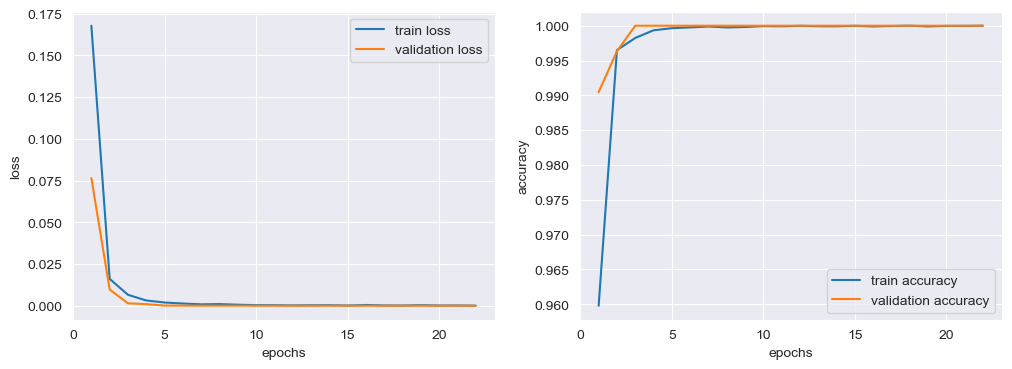

In [ ]:
# Instantiate the model
model = make_cnn_model(
    input_shape=(X_train.shape[1], 1)
)
    
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=1e-4),
    EarlyStopping(monitor="val_loss", patience=10, min_delta=1e-4, verbose=1),
]
    
# Train the model
history = model.fit(
    X_train, 
    y_train, 
    best_params['epochs'], 
    best_params['batch_size'], 
    validation_data = (X_val, y_val),
    callbacks=callbacks
)

# extract the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plots: loss and accuracy
real_n_epochs = len(history.history['loss'])
training_plot(real_n_epochs, train_loss, val_loss, train_acc, val_acc)

In [ ]:
# load the best model
model = models.load_model("best_model.h5")

# evaluate its performance on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

469/469 [==============================] - 1s 1ms/step - loss: 8.5161e-07 - accuracy: 1.0000
Test accuracy 1.0
Test loss 8.516148568560311e-07
